# PCA vs. Manifold-Learning-Based Dimensionality Reduction

**Goal:**  
1. Load the Iris dataset (4 features, 3 classes).  
2. Standardize the features.  
3. Apply a *principal components analysis* (PCA) method.  
4. Apply *manifold-learning* methods (t-SNE, Isomap).  
5. Visualize and compare the 2D embeddings.

---

## 1. Imports

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

# set Seaborn style
sns.set(style="whitegrid", context="notebook")

## 2. Data Preparation

- Load Iris (150 samples, 4 features: sepal/petal length/width).  
- Standardize features to zero mean and unit variance.

In [3]:
# load and standardize
iris = load_iris()
X = iris.data         # shape (150,4)
y = iris.target       # classes 0,1,2
feature_names = iris.feature_names
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"X_scaled shape: {X_scaled.shape}")
print("Feature names:", feature_names)

X_scaled shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 3. Raw Data Visualization (first two features)

Just to get a sense of the original feature space.

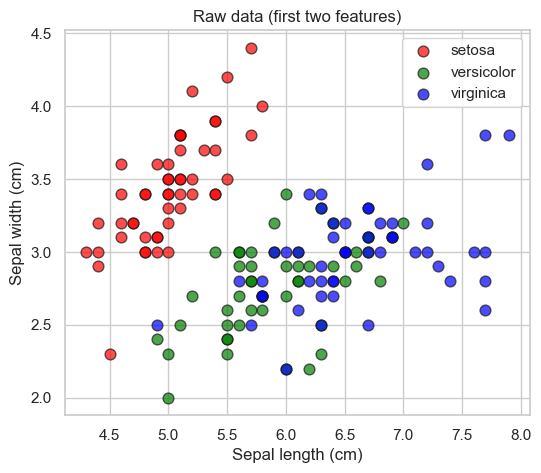

In [7]:
plt.figure(figsize=(6,5))
for cls, color, label in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(
        X[y==cls, 0], X[y==cls, 1],
        c=color, label=label, edgecolor='k', s=60, alpha=0.7
    )
plt.xlabel(feature_names[0].capitalize())
plt.ylabel(feature_names[1].capitalize())
plt.title('Raw data (first two features)')
plt.legend()
plt.show()

## 4. PCA

Principal Component Analysis finds the directions of maximum variance.

Explained variance ratios: [0.73  0.229]


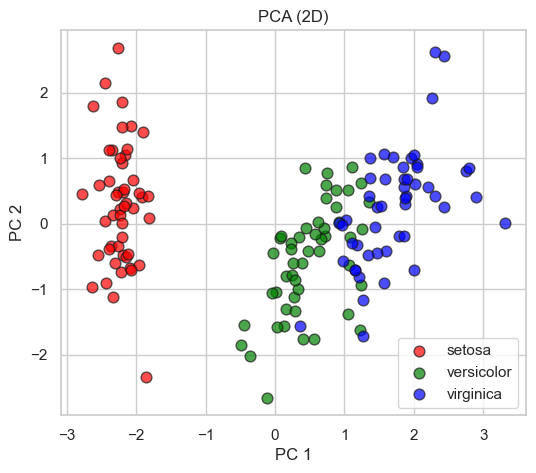

In [8]:
# apply PCA to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# explained variance
print("Explained variance ratios:", np.round(pca.explained_variance_ratio_, 3))

# plot PCA embedding
plt.figure(figsize=(6,5))
for cls, color, label in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(
        X_pca[y==cls, 0], X_pca[y==cls, 1],
        c=color, label=label, edgecolor='k', s=60, alpha=0.7
    )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA (2D)')
plt.legend()
plt.show()

## 5. Manifold-Learning-Based: t-SNE

t-Distributed Stochastic Neighbor Embedding tries to preserve local neighborhoods.

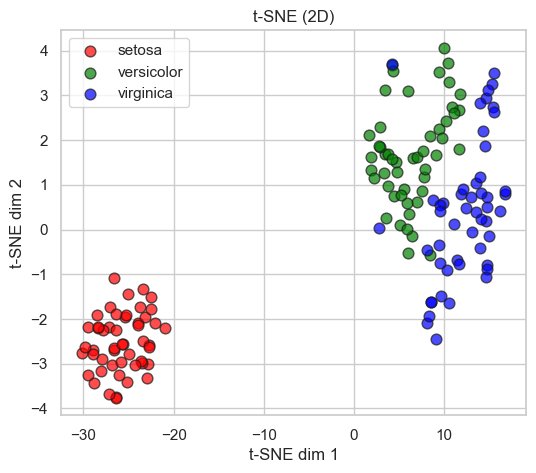

In [9]:
# apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# plot t-SNE embedding
plt.figure(figsize=(6,5))
for cls, color, label in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(
        X_tsne[y==cls, 0], X_tsne[y==cls, 1],
        c=color, label=label, edgecolor='k', s=60, alpha=0.7
    )
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.title('t-SNE (2D)')
plt.legend()
plt.show()

## 6. Manifold-Learning-Based: Isomap

Isomap constructs a neighborhood graph and preserves geodesic distances.

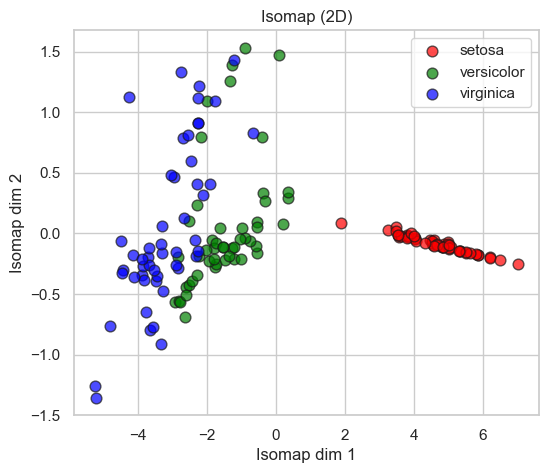

In [10]:
# apply Isomap
iso = Isomap(n_components=2, n_neighbors=10)
X_iso = iso.fit_transform(X_scaled)

# plot Isomap embedding
plt.figure(figsize=(6,5))
for cls, color, label in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(
        X_iso[y==cls, 0], X_iso[y==cls, 1],
        c=color, label=label, edgecolor='k', s=60, alpha=0.7
    )
plt.xlabel('Isomap dim 1')
plt.ylabel('Isomap dim 2')
plt.title('Isomap (2D)')
plt.legend()
plt.show()

## 7. Comparison of Embeddings

Side‐by‐side comparison of PCA, t-SNE, and Isomap embeddings.

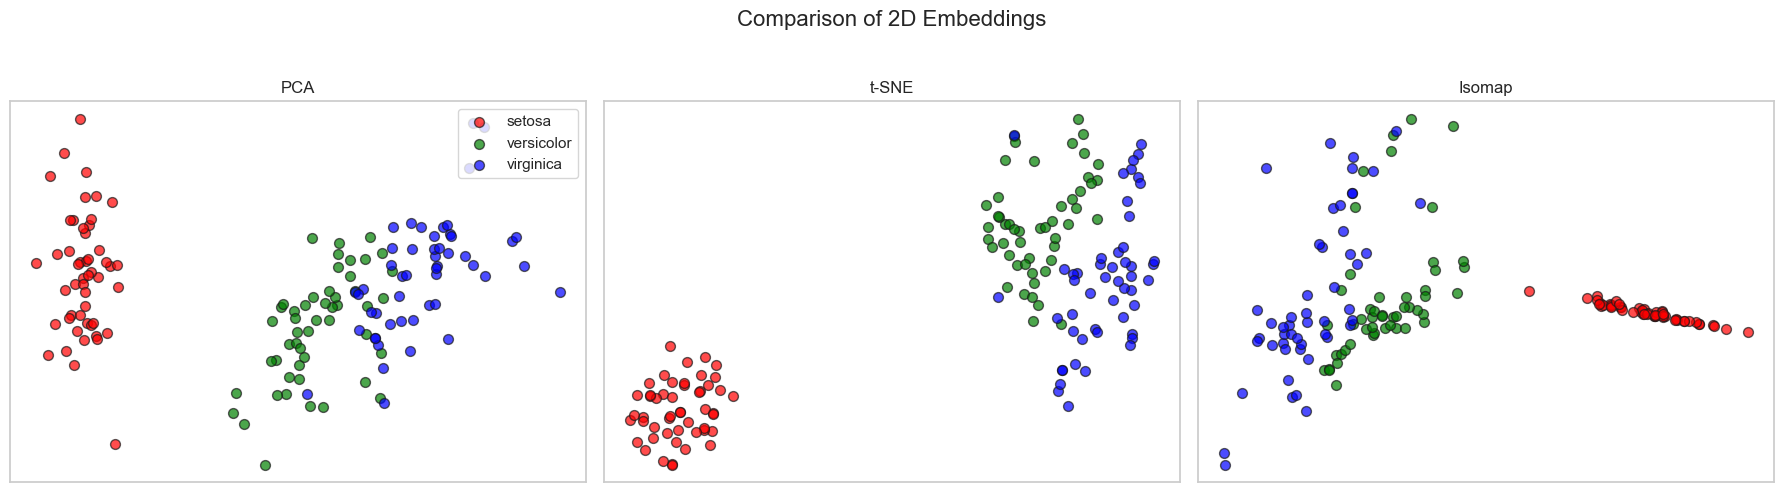

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
embeddings = [(X_pca, 'PCA'), (X_tsne, 't-SNE'), (X_iso, 'Isomap')]

for ax, (X_emb, title) in zip(axes, embeddings):
    for cls, color, label in zip([0,1,2], ['red','green','blue'], target_names):
        ax.scatter(
            X_emb[y==cls, 0], X_emb[y==cls, 1],
            c=color, label=label, edgecolor='k', s=50, alpha=0.7
        )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

axes[0].legend(loc='upper right')
plt.suptitle('Comparison of 2D Embeddings', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# What We Learned

- PCA is a *linear* projection, maximizing global variance (axes‐aligned).  
- t-SNE is a *nonlinear* technique, preserving local structure at the expense of global distances.  
- Isomap preserves approximate geodesic distances in a neighborhood graph.  
- Different methods reveal different aspects of the data manifold.

Feel free to tweak hyper‐parameters (e.g. perplexity in t-SNE, n_neighbors in Isomap) and see how the embeddings change!